In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import cv2
import matplotlib.image as mpimg
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage import data, img_as_float
from skimage.segmentation import felzenszwalb, inverse_gaussian_gradient, checkerboard_level_set, morphological_geodesic_active_contour, slic, quickshift, watershed, chan_vese, active_contour, flood, flood_fill
from skimage.segmentation import morphological_chan_vese as mcv
from skimage.filters import gaussian
import skimage.filters as filters
from skimage.segmentation import mark_boundaries
from PIL import Image
import csv

Watershed number of segments: 256
Watershed number of segments: 256
Watershed number of segments: 256
Watershed number of segments: 256
Watershed number of segments: 256
Watershed number of segments: 256
Watershed number of segments: 256
Watershed number of segments: 256


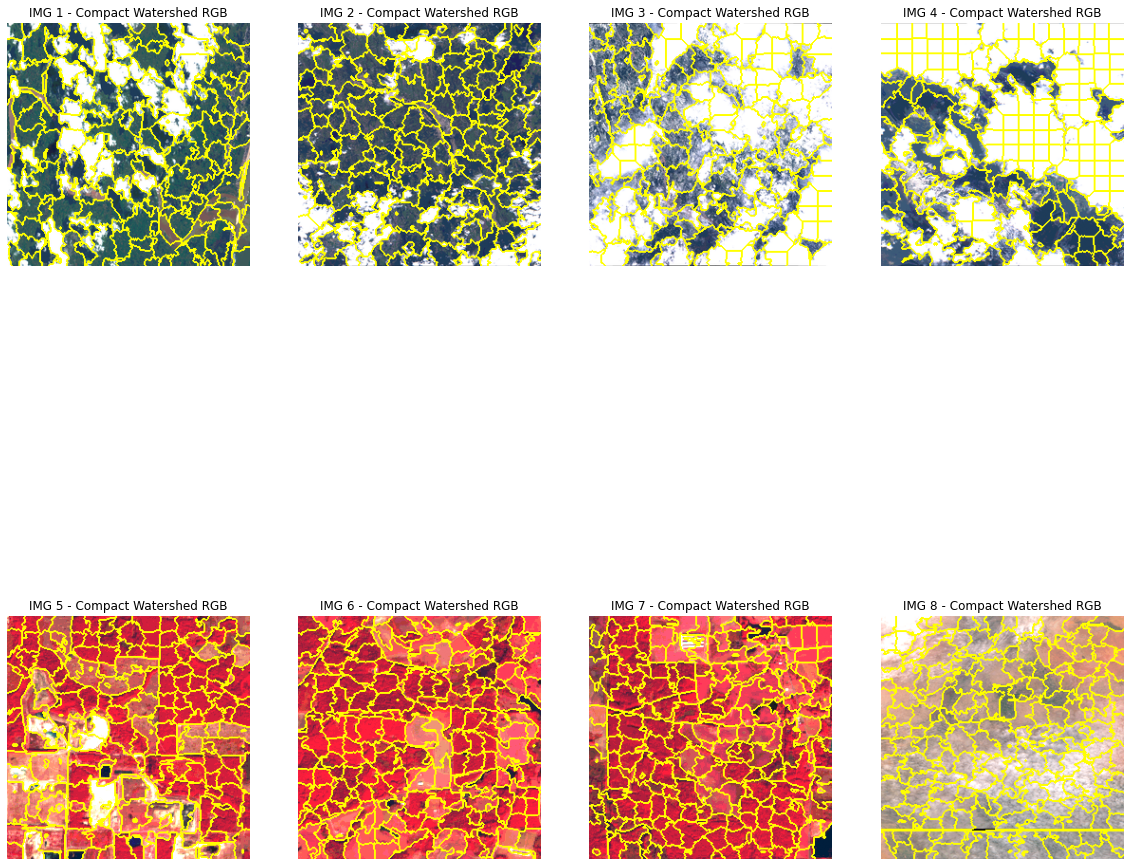

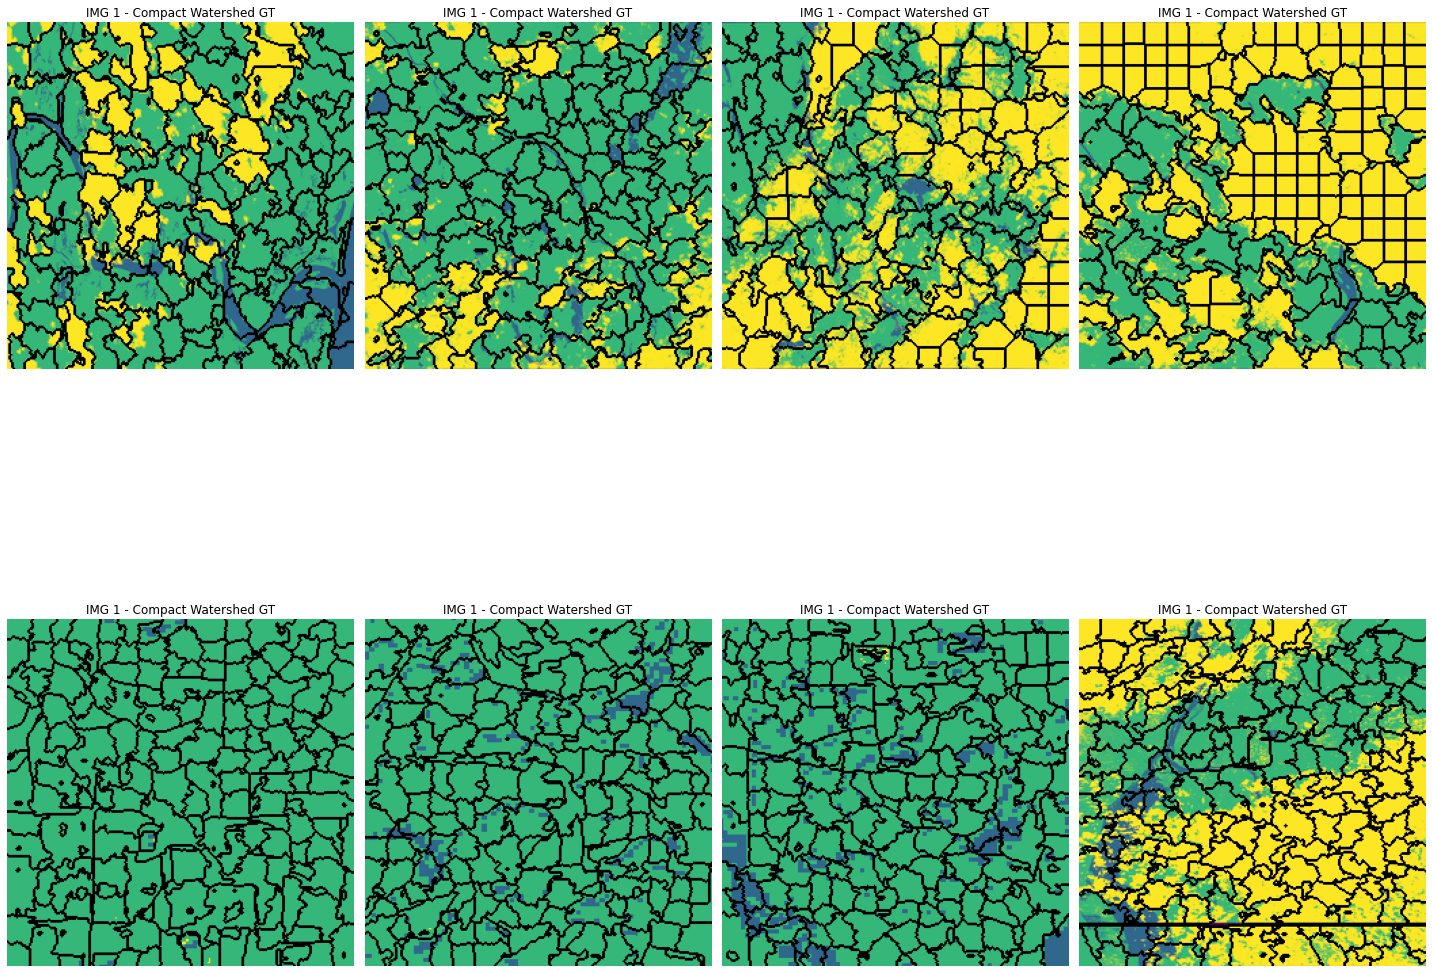

In [5]:
def get_data():

    gt = []
    rgb = []
    for e in os.listdir('/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/RGB'):
        #if 'EMSR' not in e:
        rgb.append(Image.open('/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/RGB/' + e).resize((256, 256), Image.ANTIALIAS))

    for e in os.listdir('/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/GT'):
        #if 'EMSR' not in e:
        gt.append(Image.open('/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/GT/' + e).resize((256, 256), Image.ANTIALIAS))

    return gt, rgb

input1, input2 = get_data()

def felzenszwalb_seg(images, images2):

    float_images = []
    segments_fz = []
    for e in images:

        temp = img_as_float(e)

        float_images.append(temp)

        #segments_fz.append(felzenszwalb(temp, scale=400, sigma=0.75, min_size=0))
        segments_fz.append(felzenszwalb(temp, scale=450, sigma=0.50, min_size=0))

    float_images_gt = []
    for e in images2:
        temp = img_as_float(e)

        float_images_gt.append(temp)

    for num in segments_fz:
        print(f'Felzenszwalb number of segments: {len(np.unique(num))}')

    fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

    ax[0, 0].imshow(mark_boundaries(float_images[0], segments_fz[0]))
    ax[0, 0].set_title("IMG 1 - Felzenszwalb RGB")
    ax[0, 1].imshow(mark_boundaries(float_images[1], segments_fz[1]))
    ax[0, 1].set_title('IMG 2 - Felzenszwalb RGB')
    ax[1, 0].imshow(mark_boundaries(float_images[2], segments_fz[2]))
    ax[1, 0].set_title('IMG 3 - Felzenszwalb RGB')
    ax[1, 1].imshow(mark_boundaries(float_images[3], segments_fz[3]))
    ax[1, 1].set_title('IMG 4 - Felzenszwalb RGB')

    fig2, ax2 = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

    ax2[0, 0].imshow(mark_boundaries(float_images_gt[0], segments_fz[0], color = (0,0,0)))
    ax2[0, 0].set_title("IMG 1 - Felzenszwalb GT")
    ax2[0, 1].imshow(mark_boundaries(float_images_gt[1], segments_fz[1], color = (0,0,0)))
    ax2[0, 1].set_title('IMG 2 - Felzenszwalb GT')
    ax2[1, 0].imshow(mark_boundaries(float_images_gt[2], segments_fz[2], color = (0,0,0)))
    ax2[1, 0].set_title('IMG 3 - Felzenszwalb GT')
    ax2[1, 1].imshow(mark_boundaries(float_images_gt[3], segments_fz[3], color = (0,0,0)))
    ax2[1, 1].set_title('IMG 4 - Felzenszwalb GT')

    for a in ax.ravel():
        a.set_axis_off()

    for b in ax2.ravel():
        b.set_axis_off()

    plt.tight_layout()
    plt.show()

def slic_seg(images, images2):

    float_images = []
    segments_fz = []
    for e in images:

        temp = img_as_float(e)

        float_images.append(temp)

        segments_fz.append(slic(temp, n_segments=250, compactness=10, sigma=1,
                         start_label=1))

    float_images_gt = []
    for e in images2:
        temp = img_as_float(e)

        float_images_gt.append(temp)

    for num in segments_fz:
        print(f'SLIC number of segments: {len(np.unique(num))}')

    fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

    ax[0, 0].imshow(mark_boundaries(float_images[0], segments_fz[0]))
    ax[0, 0].set_title("IMG 1 - SLIC RGB")
    ax[0, 1].imshow(mark_boundaries(float_images[1], segments_fz[1]))
    ax[0, 1].set_title('IMG 2 - SLIC RGB')
    ax[1, 0].imshow(mark_boundaries(float_images[2], segments_fz[2]))
    ax[1, 0].set_title('IMG 3 - SLIC RGB')
    ax[1, 1].imshow(mark_boundaries(float_images[3], segments_fz[3]))
    ax[1, 1].set_title('IMG 4 - SLIC RGB')

    fig2, ax2 = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

    ax2[0, 0].imshow(mark_boundaries(float_images_gt[0], segments_fz[0], color = (0,0,0)))
    ax2[0, 0].set_title("IMG 1 - SLIC GT")
    ax2[0, 1].imshow(mark_boundaries(float_images_gt[1], segments_fz[1], color = (0,0,0)))
    ax2[0, 1].set_title('IMG 2 - SLIC GT')
    ax2[1, 0].imshow(mark_boundaries(float_images_gt[2], segments_fz[2], color = (0,0,0)))
    ax2[1, 0].set_title('IMG 3 - SLIC GT')
    ax2[1, 1].imshow(mark_boundaries(float_images_gt[3], segments_fz[3], color = (0,0,0)))
    ax2[1, 1].set_title('IMG 4 - SLIC GT')

    for a in ax.ravel():
        a.set_axis_off()

    for b in ax2.ravel():
        b.set_axis_off()

    plt.tight_layout()
    plt.show()

def quickshift_seg(images, images2):

    float_images = []
    segments_fz = []
    for e in images:

        temp = img_as_float(e)

        float_images.append(temp)

        segments_fz.append(quickshift(temp,kernel_size=3, max_dist=50, ratio=0.75))

    float_images_gt = []
    for e in images2:
        temp = img_as_float(e)

        float_images_gt.append(temp)

    for num in segments_fz:
        print(f'Quickshift number of segments: {len(np.unique(num))}')

    fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

    ax[0, 0].imshow(mark_boundaries(float_images[0], segments_fz[0]))
    ax[0, 0].set_title("IMG 1 - Quickshift RGB")
    ax[0, 1].imshow(mark_boundaries(float_images[1], segments_fz[1]))
    ax[0, 1].set_title('IMG 2 - Quickshift RGB')
    ax[1, 0].imshow(mark_boundaries(float_images[2], segments_fz[2]))
    ax[1, 0].set_title('IMG 3 - Quickshift RGB')
    ax[1, 1].imshow(mark_boundaries(float_images[3], segments_fz[3]))
    ax[1, 1].set_title('IMG 4 - Quickshift RGB')

    fig2, ax2 = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

    ax2[0, 0].imshow(mark_boundaries(float_images_gt[0], segments_fz[0], color = (0,0,0)))
    ax2[0, 0].set_title("IMG 1 - Quickshift GT")
    ax2[0, 1].imshow(mark_boundaries(float_images_gt[1], segments_fz[1], color = (0,0,0)))
    ax2[0, 1].set_title('IMG 2 - Quickshift GT')
    ax2[1, 0].imshow(mark_boundaries(float_images_gt[2], segments_fz[2], color = (0,0,0)))
    ax2[1, 0].set_title('IMG 3 - Quickshift GT')
    ax2[1, 1].imshow(mark_boundaries(float_images_gt[3], segments_fz[3], color = (0,0,0)))
    ax2[1, 1].set_title('IMG 4 - Quickshift GT')

    for a in ax.ravel():
        a.set_axis_off()

    for b in ax2.ravel():
        b.set_axis_off()

    plt.tight_layout()
    plt.show()

def watershed_seg(images, images2):

    float_images = []
    segments_fz = []
    for e in images:

        temp = img_as_float(e)

        float_images.append(temp)

        gradient = sobel(rgb2gray(temp))
        segments_fz.append(watershed(gradient, markers=250, compactness=0.001))

    float_images_gt = []
    for e in images2:
        temp = img_as_float(e)

        float_images_gt.append(temp)

    for num in segments_fz:
        print(f'Watershed number of segments: {len(np.unique(num))}')

    fig, ax = plt.subplots(2, 4, figsize=(20, 20), sharex=True, sharey=True)

    ax[0, 0].imshow(mark_boundaries(float_images[0], segments_fz[0]))
    ax[0, 0].set_title("IMG 1 - Compact Watershed RGB")
    ax[0, 1].imshow(mark_boundaries(float_images[1], segments_fz[1]))
    ax[0, 1].set_title('IMG 2 - Compact Watershed RGB')
    ax[0, 2].imshow(mark_boundaries(float_images[2], segments_fz[2]))
    ax[0, 2].set_title('IMG 3 - Compact Watershed RGB')
    ax[0, 3].imshow(mark_boundaries(float_images[3], segments_fz[3]))
    ax[0, 3].set_title('IMG 4 - Compact Watershed RGB')
    ax[1, 0].imshow(mark_boundaries(float_images[4], segments_fz[4]))
    ax[1, 0].set_title('IMG 5 - Compact Watershed RGB')
    ax[1, 1].imshow(mark_boundaries(float_images[5], segments_fz[5]))
    ax[1, 1].set_title('IMG 6 - Compact Watershed RGB')
    ax[1, 2].imshow(mark_boundaries(float_images[6], segments_fz[6]))
    ax[1, 2].set_title('IMG 7 - Compact Watershed RGB')
    ax[1, 3].imshow(mark_boundaries(float_images[7], segments_fz[7]))
    ax[1, 3].set_title('IMG 8 - Compact Watershed RGB')

    plt.savefig("RGB_CW.png")

    fig2, ax2 = plt.subplots(2, 4, figsize=(20, 20), sharex=True, sharey=True)

    ax2[0, 0].imshow(mark_boundaries(float_images_gt[0], segments_fz[0], color = (0,0,0)))
    ax2[0, 0].set_title("IMG 1 - Compact Watershed GT")
    ax2[0, 1].imshow(mark_boundaries(float_images_gt[1], segments_fz[1], color = (0,0,0)))
    ax2[0, 1].set_title("IMG 1 - Compact Watershed GT")
    ax2[0, 2].imshow(mark_boundaries(float_images_gt[2], segments_fz[2], color = (0,0,0)))
    ax2[0, 2].set_title("IMG 1 - Compact Watershed GT")
    ax2[0, 3].imshow(mark_boundaries(float_images_gt[3], segments_fz[3], color = (0,0,0)))
    ax2[0, 3].set_title("IMG 1 - Compact Watershed GT")
    ax2[1, 0].imshow(mark_boundaries(float_images_gt[4], segments_fz[4], color = (0,0,0)))
    ax2[1, 0].set_title("IMG 1 - Compact Watershed GT")
    ax2[1, 1].imshow(mark_boundaries(float_images_gt[5], segments_fz[5], color = (0,0,0)))
    ax2[1, 1].set_title("IMG 1 - Compact Watershed GT")
    ax2[1, 2].imshow(mark_boundaries(float_images_gt[6], segments_fz[6], color = (0,0,0)))
    ax2[1, 2].set_title("IMG 1 - Compact Watershed GT")
    ax2[1, 3].imshow(mark_boundaries(float_images_gt[7], segments_fz[7], color = (0,0,0)))
    ax2[1, 3].set_title("IMG 1 - Compact Watershed GT")

    plt.savefig("GT_CW.png")

    for a in ax.ravel():
        a.set_axis_off()

    for b in ax2.ravel():
        b.set_axis_off()

    plt.tight_layout()
    plt.show()

    #print(segments_fz[0])

watershed_seg(input2, input1)

In [ ]:
'''
(253, 231, 36) -> Cloud GT color code
(53, 183, 120) -> Land GT color code
(48, 103, 141) -> Water GT color code
'''
def test(method, path, path2, iter_num):

    import numpy as np
    from skimage import io, segmentation
    import matplotlib.pyplot as plt

    img = io.imread(path)
    img2 = io.imread(path2)

    if method == 'Felzenszwalb':
      segments = segmentation.felzenszwalb(img, scale=450, sigma=0.50, min_size=0)

    elif method == 'SLIC':
      segments = segmentation.slic(img, n_segments=250, compactness=10, sigma=1, start_label=1)

    elif method == 'CompactWatershed':
      gradient = sobel(rgb2gray(img))
      segments = segmentation.watershed(gradient, markers=250, compactness=0.001)

    elif method == 'Quickshift':
      segments = segmentation.quickshift(img, kernel_size=3, max_dist=50, ratio=0.75)

    else:
      segments = segmentation.slic(img, n_segments=250, compactness=10, sigma=1, start_label=1)

    pure_land = 0
    pure_cloud = 0
    pure_water = 0

    for index in np.unique(segments):
        
        segment = img.copy()
        segment[segments != index] = 0

        segment2 = img2.copy()
        segment2[segments != index] = 0

        plt.imsave('/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Segments_All/Segments_' + str(method) + '/RGB/img' + str(iter_num) + '_segment_' + str(index) + '.png', segment)
        plt.imsave('/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Segments_All/Segments_' + str(method) + '/GT/img' + str(iter_num) +'_segment_' + str(index) + '.png', segment2)
        
        land_purity, cloud_purity, water_purity =  count_land_cloud_and_water('/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Segments_All/Segments_' + str(method) + '/GT/img' + str(iter_num) +'_segment_' + str(index) + '.png')
        if land_purity > 0.9:
          pure_land += 1

        elif cloud_purity > 0.9:
          pure_cloud += 1

        elif water_purity > 0.9:
          pure_water += 1

    print('Land pure pixels are: ' + str(pure_land))
    print('Water pure pixels are: ' + str(pure_water))
    print('Cloud pure pixels are: ' + str(pure_cloud))

    with open('/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Segments_All/Segments_' + str(method) + '/segments_data.csv', 'a', newline ='') as csvfile:
      
      header = ['Image', 'Water Pure SPs', 'Land Pure SPs', 'Cloud Pure SPs']
      data = [str(path), pure_water, pure_land, pure_cloud]

      writer = csv.writer(csvfile)

      # write the header
      writer.writerow(header)

      # write the data
      writer.writerow(data)

      csvfile.close()

def get_colors_in_img(path):
    img = Image.open(path)
    colors = img.convert('RGB').getcolors()

    print(colors)

def count_land_cloud_and_water(path):

    im = Image.open(path)

    land = 0
    water = 0
    cloud = 0
    black = 0
    total = 0

    for pixel in im.getdata():

        total += 1
        if pixel == (53, 183, 120, 255):  # if your image is RGB (if RGBA, (0, 0, 0, 255) or so
            cloud += 1
        elif pixel == (253, 231, 36, 255):
            land += 1
        elif pixel == (48, 103, 141, 255):
            water += 1
        elif pixel == (0, 0, 0, 255):
            black += 1

    land_purity = land/(total - black)
    pure_land = 0

    cloud_purity = cloud/(total - black)
    pure_cloud = 0

    water_purity = water/(total - black)
    pure_water = 0

    #print('land=' + str(land) + ', cloud=' + str(cloud) + ', water=' + str(water) + ', black=' + str(black))
    #print('land %=' + str(land/(total - black)) + ', cloud %=' + str(cloud/(total - black)) + ', water %=' + str(water/(total - black)))
    #print("----------------------------------------------------")

    return land_purity, cloud_purity, water_purity

In [ ]:
num = 1
for e in os.listdir('/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/RGB'):
  test('SLIC', '/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/RGB/' + str(e), '/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/GT/' + str(e), num)
  num += 1

Land pure pixels are: 20
Water pure pixels are: 6
Cloud pure pixels are: 54
Land pure pixels are: 14
Water pure pixels are: 1
Cloud pure pixels are: 54
Land pure pixels are: 43
Water pure pixels are: 0
Cloud pure pixels are: 10
Land pure pixels are: 98
Water pure pixels are: 0
Cloud pure pixels are: 26
Land pure pixels are: 0
Water pure pixels are: 0
Cloud pure pixels are: 186
Land pure pixels are: 0
Water pure pixels are: 0
Cloud pure pixels are: 167
Land pure pixels are: 0
Water pure pixels are: 0
Cloud pure pixels are: 165
Land pure pixels are: 81
Water pure pixels are: 1
Cloud pure pixels are: 41


In [ ]:
num = 1
for e in os.listdir('/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/RGB'):
  test('Felzenszwalbs', '/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/RGB/' + str(e), '/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/GT/' + str(e), num)
  num += 1

Land pure pixels are: 20
Water pure pixels are: 6
Cloud pure pixels are: 54
Land pure pixels are: 14
Water pure pixels are: 1
Cloud pure pixels are: 54
Land pure pixels are: 43
Water pure pixels are: 0
Cloud pure pixels are: 10
Land pure pixels are: 98
Water pure pixels are: 0
Cloud pure pixels are: 26
Land pure pixels are: 0
Water pure pixels are: 0
Cloud pure pixels are: 186
Land pure pixels are: 0
Water pure pixels are: 0
Cloud pure pixels are: 167
Land pure pixels are: 0
Water pure pixels are: 0
Cloud pure pixels are: 165
Land pure pixels are: 81
Water pure pixels are: 1
Cloud pure pixels are: 41


In [ ]:
num = 2
for e in os.listdir('/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/RGB'):
  test('Quickshift', '/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/RGB/' + str(e), '/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/GT/' + str(e), num)
  num += 1

Land pure pixels are: 459
Water pure pixels are: 121
Cloud pure pixels are: 1368


In [ ]:
num = 1
for e in os.listdir('/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/RGB'):
  test('CompactWatershed', '/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/RGB/' + str(e), '/content/drive/MyDrive/Third_Year_Project/PyCharm Folder/Sk-img segmentation/Temp_Images/GT/' + str(e), num)
  num += 1

Land pure pixels are: 32
Water pure pixels are: 3
Cloud pure pixels are: 76
Land pure pixels are: 4
Water pure pixels are: 0
Cloud pure pixels are: 96
Land pure pixels are: 54
Water pure pixels are: 0
Cloud pure pixels are: 25
Land pure pixels are: 107
Water pure pixels are: 0
Cloud pure pixels are: 29
Land pure pixels are: 0
Water pure pixels are: 0
Cloud pure pixels are: 251
Land pure pixels are: 0
Water pure pixels are: 0
Cloud pure pixels are: 213
Land pure pixels are: 0
Water pure pixels are: 1
Cloud pure pixels are: 185
Land pure pixels are: 74
Water pure pixels are: 0
Cloud pure pixels are: 41
